<a href="https://colab.research.google.com/github/bok-h22/TIL-202303/blob/master/04_Document_Clustering_%26_%EC%9C%A0%EC%82%AC%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATA_PATH = "./topics"

In [ ]:
import pandas as pd
import glob, os
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 700)

# glob을 활용해 데이터 디렉토리 내에 있는 .data 파일 불러오기
all_files = glob.glob(os.path.join(DATA_PATH, "*.data"))

# 파일 이름
file_names = []

# 내용
contents = []

for data_file in all_files:

  temp_df = pd.read_table(data_file, index_col=None, header=0, encoding='latin1')

  # 파일명 가져오기
  file_name = data_file.split("/")[-1]
  file_name = file_name.split(".")[0]

  # 파일명 리스트와 내용 리스트에 각각 내용을 저장
  file_names.append(file_name)
  contents.append(temp_df.to_string())

doc_df = pd.DataFrame({"filename" : file_names, "content": contents})
doc_df.head()

,filename,content
0,video_ipod_nano_8gb,"I bought the 8, gig Ipod Nano that has the built, in video camera .\n0 Itunes has an on, line store, where you may purchase and download music and videos which will install onto the ipod .\n1 ..."
1,location_bestwestern_hotel_sfo,"Good Value good location , ideal choice .\n0 Great Location , Nice Rooms , Helpless Concierge\n1 ..."
2,speed_windows7,"Windows 7 is quite simply faster, more stable, boots faster, goes to sleep faster, comes back from sleep faster, manages your files better and on top of that it's beautiful to look at and easy to use .\n0 , faster about 20% to 30% faster at running applications than my Vista , seriously\n1 ..."
3,screen_ipod_nano_8gb,"As always, the video screen is sharp and bright .\n0 2, inch screen and a glossy, polished aluminum finish that one CNET editor described as looking like a Christmas tree ornament .\n1 ..."
4,staff_bestwestern_hotel_sfo,Staff are friendl...


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

def my_tokenizer(text):
  doc = nlp(text)

  return [token.lemma_ for token in doc if not token.is_punct ]

# 군집 수행을 위해 텍스트 벡터화를 수행
- 군집의 경우에는 `TfidfVectorizer`가 유리
- 비슷한 주제 단어를 가진 문서끼리 군집되는 것이 더 좋으므로..
- 때에 따라서는 `StandardScaling`까지 적용시켜 주는 것도 나쁘지 않음

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer = my_tokenizer, # 개발자가 직접 만든 토크나이저를 사용
    ngram_range = (1, 2),
    min_df=0.05, # df 하위 5% 미만의 단어는 사용하지 않음.
    max_df=0.95, # df 상위 95% 이상은 사용하지 않음.
    stop_words='english' # 불용어 처리. at, the, 등등 의미가 없는 단어를 사용하지 않음.
)

feature_vector = tfidf_vectorizer.fit_transform(doc_df['content']) # 내용에 대한 TFIDF 구하기

# 군집 수행
- KMeans 군집

In [ ]:
from sklearn.cluster import KMeans

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=42)
km_cluster.fit(feature_vector)

KMeans(max_iter=10000, n_clusters=3, random_state=42)

In [ ]:
# 군집 레이블 확인
cluster_labels = km_cluster.labels_
cluster_labels

array([2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0,
       2, 1, 2, 2, 1, 1, 0], dtype=int32)

In [ ]:
# 중심점 벡터 확인
cluster_centroids = km_cluster.cluster_centers_
cluster_centroids.shape

(3, 5821)

In [ ]:
doc_df['cluster_label'] = cluster_labels
doc_df.sort_values(by='cluster_label')

,filename,content,cluster_label
50,quality_toyota_camry_2007,I previously owned a Toyota 4Runner which had incredible build quality and reliability .\n0 I bought the Camry because of Toyota reliability and qua...,0
17,interior_toyota_camry_2007,"First of all, the interior has way too many cheap plastic parts like the cheap plastic center piece that houses the clock .\n0 3 blown struts at 30,000 miles, interior trim coming loose and rattling squeaking, stains on paint, and bug splats taking paint off, premature uneven brake wear, on 3rd windsh...",0
43,mileage_honda_accord_2008,"It's quiet, get good gas mileage and looks clean inside and out .\n0 The mileage is great, and I've had to get used to stopping less for gas .\n1 Thought gas ...",0
15,interior_honda_accord_2008,I love the new body style and the interior is a simple pleasure except for the center dash .\n0 ...,0
27,transmission_toyota_camry_2007,"After slowing down, transmission has to be kicked to speed up .\n0 ...",0
28,comfort_toyota_camry_2007,"Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 Seats are fine, in fact of all the smaller sedans this is the most comfortable I found for the price as I am 6', 2 and 250# .\n1 Great gas mileage and comfortable on long trips ...",0
35,gas_mileage_toyota_camry_2007,Ride seems comfortable and gas mileage fairly good averaging 26 city and 30 open road .\n0 ...,0
18,performance_honda_accord_2008,"Very happy with my 08 Accord, performance is quite adequate it has nice looks and is a great long, distance cruiser .\n0 6, 4, 3 eco engine has poor performance and gas mileage of 22 highway .\n1 Overall performance is good but comfort level is poor .\n2 ...",0
32,comfort_honda_accord_2008,"Drivers seat not comfortable, the car itself compared to other models of similar class .\n0 ...",0
31,seats_honda_accord_2008,"Front seats are very uncomfortable .\n0 No memory seats, no trip computer, can only display outside temp with trip odometer .\n1 ...",0


# 군집 별 핵심 단어 추출
- centroid에서 가장 큰 값이 가장 중심이 되는 단어

In [ ]:
# cluster_model : 군집 모델
# cluster_data : 데이터 프레임
# feature_names : 단어 목록
# cluster_num : 클러스터 개수
# top_n_features : 대표 단어 몇 개를 볼 것인지 결정
def get_cluster_details(cluster_model, cluster_data, feature_names, cluster_num, top_n_features=10):

  # top_n Feature, 파일 이름, feature tfidf값
  cluster_details = {}

  # 군집 센터 좌표(centroid) 얻어내기
  cluster_centroid = cluster_model.cluster_centers_

  # cenroid 좌표의 제일 큰 값이 그 군집의 중심 단어가 되기 때문에, 정렬해서 인덱스 얻어내기(argsort)
  center_features = cluster_centroid.argsort()[:, ::-1] # 행은 내비두고 열만 내림차순으로 정렬

  # 각 군집 별 순환(iteration) 하면서 핵심 단어, feature의 값(실수), 각 군집에 속해있는 파일명 얻어내기
  for c_num in range(cluster_num):
    # 개별 군집 별 데이터를 담아낼 준비
    cluster_details[c_num] = {}
    cluster_details[c_num]['cluster'] = c_num # 클러스터 번호 담기

    # 단어 목록 담아주기 (top n)
    top_n_feature_indexes = center_features[c_num, :top_n_features]
    top_features = [ feature_names[idx] for idx in top_n_feature_indexes ]
    cluster_details[c_num]['top_features'] = top_features

    # 단어 중심위치(centroid) 값을 담아주기 (top n)
    top_n_feature_values = cluster_centroid[c_num, top_n_feature_indexes].tolist()
    cluster_details[c_num]['top_features_value'] = top_n_feature_values

    # 군집에 포함된 파일명 담아주기
    file_names = cluster_data[cluster_data['cluster_label'] == c_num]['filename']
    file_names = file_names.tolist() # 리스트로 만들어 주기

    cluster_details[c_num]['filenames'] = file_names

  return cluster_details

In [ ]:
cluster_detail_info = get_cluster_details(
    cluster_model=km_cluster,
    cluster_data = doc_df,
    feature_names=tfidf_vectorizer.get_feature_names_out(), # tfidf에서 단어 배열 뽑아내기
    cluster_num=3,
    top_n_features=10
)

pd.DataFrame(cluster_detail_info)

,0,1,2
cluster,0,1,2
top_features,"[interior, seat, mileage, comfortable, gas, gas mileage, transmission, car, performance, quality]","[room, hotel, service, staff, food, location, bathroom, clean, price, parking]","[screen, battery, keyboard, battery life, life, kindle, video, direction, voice, feature]"
top_features_value,"[0.22268458924233767, 0.18843875999583512, 0.17197156620192264, 0.12188385213723268, 0.11874166116142788, 0.11289504796470547, 0.10228210991275061, 0.09726870184859832, 0.09234064249372974, 0.08840107005592018]","[0.26017811859894363, 0.1970191868783392, 0.175247980625076, 0.1489730556564118, 0.1255672750957394, 0.12273390651364188, 0.07319904221232953, 0.06961829251757244, 0.060365144570071895, 0.05555407200458976]","[0.13125466247823256, 0.11632465703352197, 0.06198097262611167, 0.061613607954166545, 0.05700948584431417, 0.054710842688183034, 0.05276971644785897, 0.051464140935752266, 0.0499117059414616, 0.04956521477733703]"
filenames,"[interior_honda_accord_2008, interior_toyota_camry_2007, performance_honda_accord_2008, transmission_toyota_camry_2007, comfort_toyota_camry_2007, seats_honda_accord_2008, comfort_honda_accord_2008, gas_mileage_toyota_camry_2007, mileage_honda_accord_2008, quality_toyota_camry_2007]","[location_bestwestern_hotel_sfo, staff_bestwestern_hotel_sfo, food_holiday_inn_london, rooms_swissotel_chicago, room_holiday_inn_london, service_swissotel_hotel_chicago, bathroom_bestwestern_hotel_sfo, service_bestwestern_hotel_sfo, location_holiday_inn_london, price_holiday_inn_london, food_swissotel_chicago, parking_bestwestern_hotel_sfo, rooms_bestwestern_hotel_sfo, staff_swissotel_chicago, service_holiday_inn_london, free_bestwestern_hotel_sfo]","[video_ipod_nano_8gb, speed_windows7, screen_ipod_nano_8gb, size_asus_netbook_1005ha, updates_garmin_nuvi_255W_gps, navigation_amazon_kindle, directions_garmin_nuvi_255W_gps, battery-life_amazon_kindle, speed_garmin_nuvi_255W_gps, eyesight-issues_amazon_kindle, features_windows7, display_garmin_nuvi_255W_gps, screen_garmin_nuvi_255W_gps, satellite_garmin_nuvi_255W_gps, price_amazon_kindle, keyboard_netbook_1005ha, buttons_amazon_kindle, voice_garmin_nuvi_255W_gps, screen_netbook_1005ha, battery-life_netbook_1005ha, performance_netbook_1005ha, battery-life_ipod_nano_8gb, sound_ipod_nano_8gb, fonts_amazon_kindle, accuracy_garmin_nuvi_255W_gps]"


# 유사한 문서 찾기

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# 2번 클러스터와 비슷한 문서 찾기. 얼마나 비슷한지도 확인
cluster_2_indexes = doc_df[doc_df['cluster_label'] == 2].index
cluster_2_indexes

Int64Index([ 0,  2,  3,  5,  6,  9, 10, 11, 12, 13, 14, 16, 19, 21, 22, 23, 26,
            29, 33, 39, 40, 41, 44, 46, 47],
           dtype='int64')

In [ ]:
comparison_docname = doc_df.iloc[cluster_2_indexes[0]]['filename']
print("*** 기준 문서 이름 : {} ***".format(comparison_docname))

# 2번 클러스터 문서 내의 첫 번째 문서와 다른 모든 문서들의 유사도를 구하기
similarity_pair = cosine_similarity(feature_vector[cluster_2_indexes[0]], feature_vector[cluster_2_indexes])
print(similarity_pair)

*** 기준 문서 이름 : video_ipod_nano_8gb ***
[[1.         0.04330484 0.40547079 0.05978232 0.0178229  0.03287382
  0.02808298 0.0365641  0.01815152 0.0262705  0.07357569 0.02288636
  0.05132526 0.01412072 0.03186032 0.03623705 0.02583645 0.04312429
  0.06982772 0.04833514 0.06588832 0.17103515 0.29991208 0.02286382
  0.01860438]]


가장 유사도가 큰 파일명 및 유사도:
 filename      screen_ipod_nano_8gb
similarity                0.405471
Name: 3, dtype: object


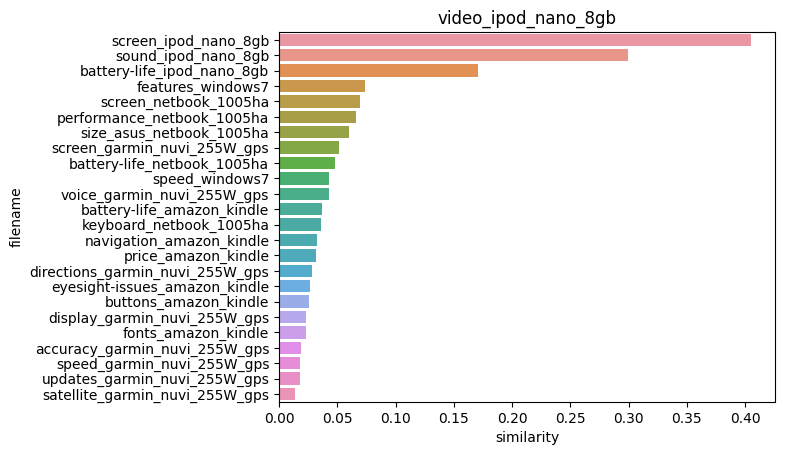

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스 추출하되 자기 자신은 제외.
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 cluster_2_indexes 추출하여 재 정렬
cluster2_sorted_indexes = cluster_2_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
cluster2_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
cluster2_sim_value = cluster2_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
cluster2_sim_df = pd.DataFrame()
cluster2_sim_df['filename'] = doc_df.iloc[cluster2_sorted_indexes]['filename']
cluster2_sim_df['similarity'] = cluster2_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', cluster2_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename',data=cluster2_sim_df)
plt.title(comparison_docname)
plt.show()